In [22]:
# import required libraries

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import idx2numpy
import skimage as sk
import scipy
import seaborn as sns

In [147]:
# Reading files 

f1 = 'train-images-idx3-ubyte'
f2 = 'train-labels-idx1-ubyte'
f3 = 't10k-images-idx3-ubyte'
f4 = 't10k-labels-idx1-ubyte'

# Convert files into numpy array
train_X = idx2numpy.convert_from_file(f1)
train_Y = idx2numpy.convert_from_file(f2)
test_X = idx2numpy.convert_from_file(f3)
test_Y = idx2numpy.convert_from_file(f4)


In [21]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

('Total number of outputs : ', 10)
('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


In [151]:
# Functions for various type of augmentation 

def Rotation(img):
    return sk.transform.rotate(img,30)

def Color_invert(img):
    return sk.util.invert(img)

def Flip(img):
    return np.flip(img)

def Random_Noise(img):
    return sk.util.random_noise(img)

def Contrast_Change(img):
    return sk.exposure.rescale_intensity(img, in_range=(10,120))

def Gamma_Correction(img,gamma=0.4):
    return sk.exposure.adjust_gamma(img,gamma)

def Sigmoid_Correction(img):
    return sk.exposure.adjust_sigmoid(img)

In [152]:
# Function takes image array and integer as input and return corresponding augmented image 

def Augmentation(img, n):
    if(n==0):
        return Rotation(img)
    elif(n==1):
        return Color_invert(img)
    elif(n==2):
            return Flip(img)
    elif(n==3):
            return Random_Noise(img)
    elif(n==4):
            return Contrast_Change(img)
    elif(n==5):
            return Gamma_Correction(img)
    elif(n==6):
            return Sigmoid_Correction(img)
    else:
        return img
    

In [153]:
Title = ["Rotation","Color_invert","Flip","Random_Noise","Contrast_Change","Gamma_Correction","Sigmoid_Correction"]

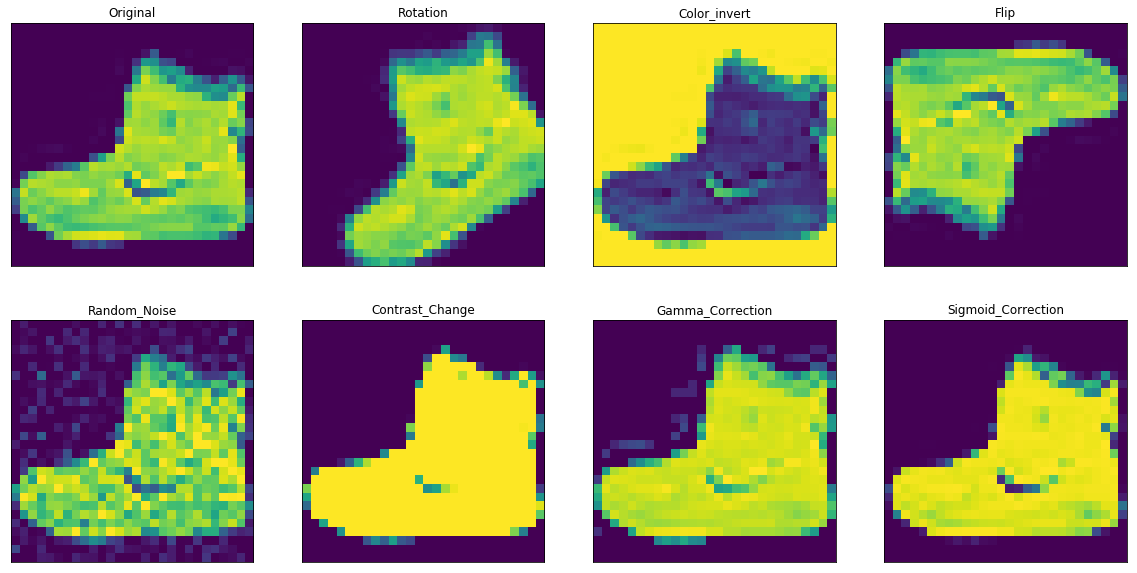

In [154]:
# Visualize augmented images 

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.imshow(train_X[0,:,:])
plt.xticks([])
plt.yticks([])
plt.title("Original")

for i in range(7):
    plt.subplot(2,4,i+2)
    imx = Augmentation(train_X[0,:,:],i)
    plt.imshow(imx)
    plt.xticks([])
    plt.yticks([])
    plt.title(Title[i])
    

In [62]:
# Data preprocessing

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [64]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

('Original label:', 9)
('After conversion to one-hot:', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))


In [65]:
batch_size = 128
n = int(60000/batch_size)

In [66]:
# Adding the augmented images in the train set

for j in range(n):
        batchX = train_X[ batch_size*j: batch_size*(j+1),:,:]
        for i in range(int(batch_size/4)):
            random = np.random.randint(0,6)
            imx = Augmentation(batchX[i*4],random)
            imx = imx.reshape(1,28,28,1)
            train_X = np.concatenate((train_X,imx), axis=0)
        print("After loop %d train_X shape would be %s" % (j,train_X.shape))

After loop 0 train_X shape would be (60032, 28, 28, 1)
After loop 1 train_X shape would be (60064, 28, 28, 1)
After loop 2 train_X shape would be (60096, 28, 28, 1)
After loop 3 train_X shape would be (60128, 28, 28, 1)
After loop 4 train_X shape would be (60160, 28, 28, 1)
After loop 5 train_X shape would be (60192, 28, 28, 1)
After loop 6 train_X shape would be (60224, 28, 28, 1)
After loop 7 train_X shape would be (60256, 28, 28, 1)
After loop 8 train_X shape would be (60288, 28, 28, 1)
After loop 9 train_X shape would be (60320, 28, 28, 1)
After loop 10 train_X shape would be (60352, 28, 28, 1)
After loop 11 train_X shape would be (60384, 28, 28, 1)
After loop 12 train_X shape would be (60416, 28, 28, 1)
After loop 13 train_X shape would be (60448, 28, 28, 1)
After loop 14 train_X shape would be (60480, 28, 28, 1)
After loop 15 train_X shape would be (60512, 28, 28, 1)
After loop 16 train_X shape would be (60544, 28, 28, 1)
After loop 17 train_X shape would be (60576, 28, 28, 1)
Af

After loop 146 train_X shape would be (64704, 28, 28, 1)
After loop 147 train_X shape would be (64736, 28, 28, 1)
After loop 148 train_X shape would be (64768, 28, 28, 1)
After loop 149 train_X shape would be (64800, 28, 28, 1)
After loop 150 train_X shape would be (64832, 28, 28, 1)
After loop 151 train_X shape would be (64864, 28, 28, 1)
After loop 152 train_X shape would be (64896, 28, 28, 1)
After loop 153 train_X shape would be (64928, 28, 28, 1)
After loop 154 train_X shape would be (64960, 28, 28, 1)
After loop 155 train_X shape would be (64992, 28, 28, 1)
After loop 156 train_X shape would be (65024, 28, 28, 1)
After loop 157 train_X shape would be (65056, 28, 28, 1)
After loop 158 train_X shape would be (65088, 28, 28, 1)
After loop 159 train_X shape would be (65120, 28, 28, 1)
After loop 160 train_X shape would be (65152, 28, 28, 1)
After loop 161 train_X shape would be (65184, 28, 28, 1)
After loop 162 train_X shape would be (65216, 28, 28, 1)
After loop 163 train_X shape wo

After loop 290 train_X shape would be (69312, 28, 28, 1)
After loop 291 train_X shape would be (69344, 28, 28, 1)
After loop 292 train_X shape would be (69376, 28, 28, 1)
After loop 293 train_X shape would be (69408, 28, 28, 1)
After loop 294 train_X shape would be (69440, 28, 28, 1)
After loop 295 train_X shape would be (69472, 28, 28, 1)
After loop 296 train_X shape would be (69504, 28, 28, 1)
After loop 297 train_X shape would be (69536, 28, 28, 1)
After loop 298 train_X shape would be (69568, 28, 28, 1)
After loop 299 train_X shape would be (69600, 28, 28, 1)
After loop 300 train_X shape would be (69632, 28, 28, 1)
After loop 301 train_X shape would be (69664, 28, 28, 1)
After loop 302 train_X shape would be (69696, 28, 28, 1)
After loop 303 train_X shape would be (69728, 28, 28, 1)
After loop 304 train_X shape would be (69760, 28, 28, 1)
After loop 305 train_X shape would be (69792, 28, 28, 1)
After loop 306 train_X shape would be (69824, 28, 28, 1)
After loop 307 train_X shape wo

After loop 434 train_X shape would be (73920, 28, 28, 1)
After loop 435 train_X shape would be (73952, 28, 28, 1)
After loop 436 train_X shape would be (73984, 28, 28, 1)
After loop 437 train_X shape would be (74016, 28, 28, 1)
After loop 438 train_X shape would be (74048, 28, 28, 1)
After loop 439 train_X shape would be (74080, 28, 28, 1)
After loop 440 train_X shape would be (74112, 28, 28, 1)
After loop 441 train_X shape would be (74144, 28, 28, 1)
After loop 442 train_X shape would be (74176, 28, 28, 1)
After loop 443 train_X shape would be (74208, 28, 28, 1)
After loop 444 train_X shape would be (74240, 28, 28, 1)
After loop 445 train_X shape would be (74272, 28, 28, 1)
After loop 446 train_X shape would be (74304, 28, 28, 1)
After loop 447 train_X shape would be (74336, 28, 28, 1)
After loop 448 train_X shape would be (74368, 28, 28, 1)
After loop 449 train_X shape would be (74400, 28, 28, 1)
After loop 450 train_X shape would be (74432, 28, 28, 1)
After loop 451 train_X shape wo

In [120]:
for j in range(n):
        batchY = train_Y_one_hot[ batch_size*j: batch_size*(j+1)]
        for i in range(int(batch_size/4)):
            label = batchY[i*4]
            label = label.reshape(1,10)
            train_Y_one_hot = np.concatenate((train_Y_one_hot,label), axis=0)

In [155]:
# Shape of train data after adding augmented images
print(train_X.shape, train_Y_one_hot.shape)

((60000, 28, 28), (74976, 10))


In [ ]:
#Splitting train data in two parts: train and cross validation

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [123]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((59980, 28, 28, 1), (14996, 28, 28, 1), (59980, 10), (14996, 10))

In [124]:
# import required libraries

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [125]:
batch_size = 64
epochs = 20
num_classes = 10

In [126]:
# Convolution model is defined with three layer 
fashion_model = Sequential()

# Layer 1, 32 filters with kernel size 3X3 and same padding
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                           # Leakey Relu activation function
fashion_model.add(MaxPooling2D((2, 2),padding='same'))            # Max pooling with filter size 2X2

#Layer 2, 64 filters with kernel size 3X3 and same padding
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#Layer 3, 128 filters with kernel size 3X3 and same padding
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Fully connected layer
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [127]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [128]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [129]:
# Training the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 59980 samples, validate on 14996 samples
Epoch 1/20
59980/59980 [==============================] - 56s 934us/step - loss: 0.5752 - acc: 0.7900 - val_loss: 0.4167 - val_acc: 0.8434
Epoch 2/20
59980/59980 [==============================] - 56s 934us/step - loss: 0.3821 - acc: 0.8582 - val_loss: 0.3756 - val_acc: 0.8597
Epoch 3/20
59980/59980 [==============================] - 56s 937us/step - loss: 0.3307 - acc: 0.8764 - val_loss: 0.3456 - val_acc: 0.8722
Epoch 4/20
59980/59980 [==============================] - 56s 942us/step - loss: 0.2965 - acc: 0.8877 - val_loss: 0.3236 - val_acc: 0.8792
Epoch 5/20
59980/59980 [==============================] - 53s 879us/step - loss: 0.2663 - acc: 0.8996 - val_loss: 0.3331 - val_acc: 0.8788
Epoch 6/20
59980/59980 [==============================] - 55s 924us/step - loss: 0.2393 - acc: 0.9096 - val_loss: 0.3285 - val_acc: 0.8846
Epoch 7/20
59980/59980 [==============================] - 56s 934us/step - loss: 0.2189 - acc: 0.9169 - val_loss: 0.

In [130]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [131]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.4761507659826428)
('Test accuracy:', 0.9171)


As we can see, training data has accuracy of 0.9575 while cross validation data has accuracy of 0.8858 the model is considered as overfitted. It can better visualised using graph of accuracy vs iteration

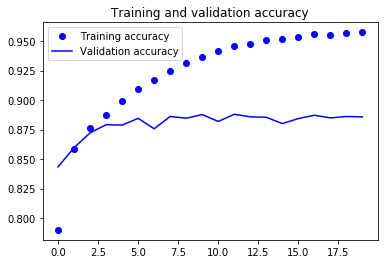

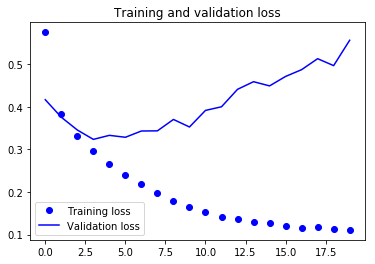

In [132]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

To avoid the overfitting, batch normalization and dropout are applied on model

In [138]:
batch_size = 64
epochs = 20
num_classes = 10

In [139]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(BatchNormalization())                                       # Batch Normalization
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))                                              # Dropout

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(BatchNormalization())                            
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [140]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
__________

In [141]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [142]:
# Training the model
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 59980 samples, validate on 14996 samples
Epoch 1/20
59980/59980 [==============================] - 112s 2ms/step - loss: 0.7351 - acc: 0.7308 - val_loss: 0.5079 - val_acc: 0.8129
Epoch 2/20
59980/59980 [==============================] - 114s 2ms/step - loss: 0.5146 - acc: 0.8095 - val_loss: 0.4278 - val_acc: 0.8367
Epoch 3/20
59980/59980 [==============================] - 115s 2ms/step - loss: 0.4573 - acc: 0.8299 - val_loss: 0.4253 - val_acc: 0.8451
Epoch 4/20
59980/59980 [==============================] - 116s 2ms/step - loss: 0.4212 - acc: 0.8435 - val_loss: 0.3558 - val_acc: 0.8656
Epoch 5/20
59980/59980 [==============================] - 116s 2ms/step - loss: 0.3938 - acc: 0.8527 - val_loss: 0.3453 - val_acc: 0.8694
Epoch 6/20
59980/59980 [==============================] - 121s 2ms/step - loss: 0.3779 - acc: 0.8585 - val_loss: 0.3323 - val_acc: 0.8738
Epoch 7/20
59980/59980 [==============================] - 121s 2ms/step - loss: 0.3610 - acc: 0.8655 - val_loss: 0.3386 - 

In [143]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 3s 327us/step


In [144]:
# Test accuracy
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.2392364403128624)
('Test accuracy:', 0.9183)


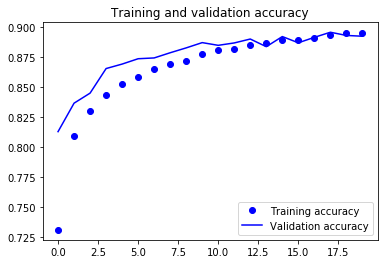

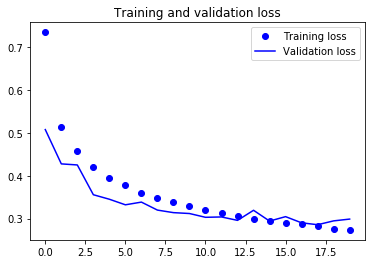

In [145]:
# Plotting accuracy vs. #epoch for train and validation data

accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the graph we can see that the problem of overfitting has been resolved, but there is no significant change in accuracy of test data 